<a href="https://colab.research.google.com/github/bjungweapon/mjc.ai.ml/blob/BDU/BDU.ch08_boston_housing_l2_l1_restriction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 sklearn 에서 사용하는  toy data를 이용한다.


1. data를 이용하기 위해서 module import ,
   data를 load 하겠습니다.

In [1]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Now you have the data and target variables:
# data: features (X)
# target: target variable (y)

# You can use these variables in your further analysis
# Example:
# x_data = data
# y_data = target.reshape(target.size, 1)

In [2]:
x_data = data
y_data = target.reshape(target.size,1)
y_data.shape # (506, 1)

(506, 1)

2. data 쳐다보기

In [3]:
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [4]:
target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

  통계적인 내용
  

In [5]:
raw_df.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1012.000000,1012.000000,1012.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,180.143778,12.008350,16.834792,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534
std,188.132839,17.250728,9.912616,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000
25%,0.257830,0.000000,8.375000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000
50%,24.021000,7.240000,18.100000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000
75%,391.435000,16.780000,21.890000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000
max,396.900000,100.000000,50.000000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000


raw_df.info

In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1012 non-null   float64
 1   1       1012 non-null   float64
 2   2       1012 non-null   float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
dtypes: float64(11)
memory usage: 87.1 KB


3. 전처리 , Pre-Processing

In [7]:
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,5)).fit(x_data) # (1)
x_scaled_data = minmax_scale.transform(x_data) # (2)

x_scaled_data[:3]

array([[0.00000000e+00, 9.00000000e-01, 3.39076246e-01, 0.00000000e+00,
        1.57407407e+00, 2.88752635e+00, 3.20803296e+00, 1.34601570e+00,
        0.00000000e+00, 1.04007634e+00, 1.43617021e+00, 5.00000000e+00,
        4.48399558e-01],
       [1.17961270e-03, 0.00000000e+00, 1.21151026e+00, 0.00000000e+00,
        8.64197531e-01, 2.73998850e+00, 3.91349125e+00, 1.74480990e+00,
        2.17391304e-01, 5.24809160e-01, 2.76595745e+00, 5.00000000e+00,
        1.02235099e+00],
       [1.17848872e-03, 0.00000000e+00, 1.21151026e+00, 0.00000000e+00,
        8.64197531e-01, 3.47192949e+00, 2.99691040e+00, 1.74480990e+00,
        2.17391304e-01, 5.24809160e-01, 2.76595745e+00, 4.94868627e+00,
        3.17328918e-01]])

4. hold-out  , 쪼개기

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled_data, y_data, test_size=0.33, random_state=42)
# X 데이터의 학습 데이터셋, X 데이터의 테스트 데이터셋
# Y 데이터의 학습 데이터셋, Y 데이터의 테스트 데이터셋

X_train.shape, X_test.shape, y_train.shape, y_test.shape
# ((339, 13), (167, 13), (339, 1), (167, 1))

((339, 13), (167, 13), (339, 1), (167, 1))

5. 학습  ( fit, ) 및 예측 ( predict )

In [9]:
from sklearn import  linear_model

regr = linear_model.LinearRegression(
         fit_intercept=True, copy_X=True, n_jobs=8) # Removed normalize parameter
lasso_regr = linear_model.Lasso(
         alpha=0.01, fit_intercept=True, copy_X=True) # Removed normalize parameter
ridge_regr = linear_model.Ridge(
         alpha=0.01, fit_intercept=True, copy_X=True) # Removed normalize parameter
SGD__regr = linear_model.SGDRegressor(penalty="l2", alpha=0.01,
                                      max_iter=1000, tol=0.001, eta0=0.01)

기본 선형 회귀 모델 (정규화 없이 최소제곱 해 구함)

fit_intercept=True: 절편
𝑏
b 를 학습에 포함

copy_X=True: 입력 데이터를 복사하여 내부에서 사용 (원본 보호)

n_jobs=8: 병렬 처리에 사용할 CPU 코어 수 (8개 사용)

👉 기본 모델로, 어떤 제약이나 정규화도 적용되지 않습니다.


---

L1 정규화 기반 선형 회귀 (Lasso Regression)

alpha=0.01: 정규화 강도 (λ), 클수록 가중치들이 더 작아지고, 일부는 0이 됨 (특성 선택 효과)

희소 모델(Sparse model)을 만들고 싶을 때 유용

👉
𝐽
(
𝑤
)
=
MSE
+
𝜆
∑
∣
𝑤
𝑗
∣
J(w)=MSE+λ∑∣w
j
​
 ∣

 -------

 L2 정규화 기반 선형 회귀 (Ridge Regression)

alpha=0.01: 정규화 강도

모든 가중치를 0에 가깝게 만들지만 완전히 0으로 만들진 않음 → 해석력은 유지

👉
𝐽
(
𝑤
)
=
MSE
+
𝜆
∑
𝑤
𝑗
2
J(w)=MSE+λ∑w
j
2
​



---------------------

경사 하강법을 사용해서 점진적으로 학습하는 회귀 모델

penalty="l2": Ridge (L2 정규화) 사용

alpha=0.01: 정규화 계수 (penalty strength)

max_iter=1000: 최대 반복 횟수

tol=0.001: 수렴 기준 (cost 변화가 이보다 작아지면 종료)

eta0=0.01: 초기 학습률

👉 배치 기반이 아닌 SGD 방식으로 더 빠르고, 대용량 데이터에 적합합니다.




In [10]:
regr.fit(X_train, y_train)

LinearRegression(n_jobs=8)

In [ ]:
print('Coefficients: ', regr.coef_)
print('intercept: ', regr.intercept_)

Coefficients:  [[-2.2909694   0.75646446  0.3175988   0.64773362 -1.57170572  4.072961
  -0.2495622  -3.12801167  1.08032801 -0.86075588 -1.74599822  0.93351697
  -3.96876082]]
intercept:  [25.44049052]


In [ ]:
regr.predict(x_data[:5])

array([[106.97641228],
       [114.82847044],
       [138.8634193 ],
       [159.67751118],
       [150.73777232]])

아래 부분은 수동으로 구현 한 것. ( library를 사용하지 않고 수동으로 구분한 것으로 우리는 이런 방법을 사용하지 않을 것이다 )

In [ ]:
x_data[:5].dot(regr.coef_.T) + regr.intercept_

array([[106.97641228],
       [114.82847044],
       [138.8634193 ],
       [159.67751118],
       [150.73777232]])

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_true = y_test.copy()
y_hat = regr.predict(X_test)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)

(0.726157083655247, 3.1482557548168333, 20.7240234373398)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

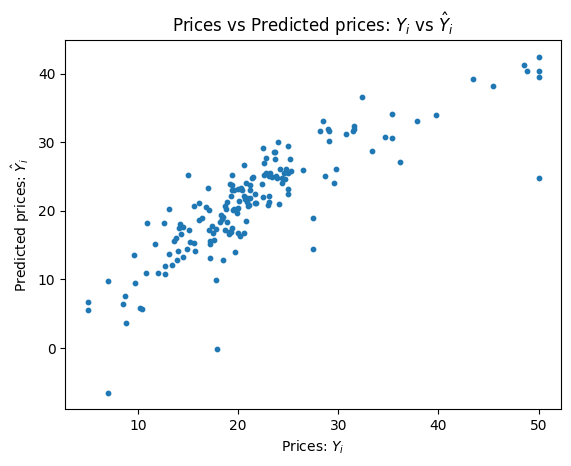

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

 ## 각 모델별로 성적 평가 ( R^2, MAE, MSE )를 각각 구해서 비교해 보자 )

SGDRegressor는 조금 더 오차가 있으며, 이는 학습률, 반복 횟수, 데이터 순서 등에 따라 바뀔 수 있습니다.

Lasso는 가중치(기울기)를 0에 더 가깝게 만드는 경향이 있으나, 이번 예제에서는 큰 차이는 없습니다 (특성이 1개라서).

모든 모델은 비슷한 예측 성능을 보임.

차이는 정규화 유무와 방식, 학습 방식에 있음:

LinearRegression: 전통적인 최소제곱 해

Ridge: 가중치를 작게 만들며 과적합 방지

Lasso: 불필요한 변수 제거 가능 (희소성)

SGDRegressor: 데이터가 많을 때 적합, 빠르지만 다소 불안정

1. Full Batch + L2 정규화: Ridge

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.01)
model.fit(X_train, y_train)


Ridge(alpha=0.01)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_true = y_test.copy()
y_hat = model.predict(X_test)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)


(0.6597565108509129, 3.4142607003303715, 25.749119742249842)

2. Full Batch + L1 정규화: Lasso

In [ ]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.01)
model.fit(X_train, y_train)


Lasso(alpha=0.01)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_true = y_test.copy()
y_hat = model.predict(X_test)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)


(0.726313642738127, 3.141114807548394, 20.71217527947528)

3. Full Batch + No Regularization: LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_true = y_test.copy()
y_hat = model.predict(X_test)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)


(0.726157083655247, 3.1482557548168333, 20.7240234373398)

4. SGD (Mini-Batch) + L2 정규화

In [ ]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(penalty='l2', alpha=0.01, max_iter=1000, learning_rate='invscaling', random_state=42)
model.fit(X_train, y_train.ravel())



SGDRegressor(alpha=0.01, random_state=42)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_true = y_test.copy()
y_hat = model.predict(X_test)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)


(0.6601029881070334, 3.4147987068011934, 25.722898860321653)

5. SGD (Mini-Batch) + L1 정규화

In [ ]:
model = SGDRegressor(penalty='l1', alpha=0.01, max_iter=1000, learning_rate='invscaling', random_state=42)
model.fit(X_train, y_train.ravel())


SGDRegressor(alpha=0.01, penalty='l1', random_state=42)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_true = y_test.copy()
y_hat = model.predict(X_test)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)


(0.659367319153729, 3.414208625980783, 25.778573189363662)

6. SGD (Mini-Batch) + ElasticNet (L1 + L2 혼합)

In [ ]:
model = SGDRegressor(penalty='elasticnet', l1_ratio=0.5, alpha=0.01, max_iter=1000, learning_rate='invscaling', random_state=42)
model.fit(X_train, y_train.ravel())


SGDRegressor(alpha=0.01, l1_ratio=0.5, penalty='elasticnet', random_state=42)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_true = y_test.copy()
y_hat = model.predict(X_test)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)


(0.6597565108509129, 3.4142607003303715, 25.749119742249842)

SGDRegressor는 내부적으로 mini-batch를 사용하며, full-batch 방식이 필요하다면 Ridge, Lasso, LinearRegression 등을 사용해야 합니다. 각 방식은 fit 함수 내부에서 처리되므로 별도로 batch 크기를 명시하지 않아도 됩니다.